In [11]:
import os
import torch
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

%matplotlib inline

PATH = "model_densenet.pt"

In [15]:
def find_classes(path):
    classes = os.listdir(path)
    classes.sort()
    class_to_idx = {classes[i]: i for i in range(len(classes))}
    return classes, class_to_idx


classes, class_to_idx = find_classes("images/train")
idx_to_class = {y:x for x,y in class_to_idx.items()}
print(idx_to_class)

{0: 'beluga_yeezy', 1: 'core_black_ultra_boost', 2: 'frozen_yellow_yeezy', 3: 'jordan_1_chicago', 4: 'jordan_1_shadow', 5: 'jordan_1_shattered_backboard', 6: 'pirate_black_yeezy', 7: 'solar_red_ultra_boost', 8: 'triple_white_ultra_boost'}


In [3]:
model = torch.load(PATH)
print(model)

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 96, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(96, 192, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(192, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(144, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

)


In [4]:
# set model for evaluation mode
model.eval()

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 96, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(96, 192, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(192, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(144, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [5]:
# Process our image
def process_image(image_path):
    # Load image
    img = Image.open(image_path)
    
    # Get the dimensions of the image
    width, height = img.size
    
    # Resize by keeping the aspect ratio, but changing the dimension so the shortest side is 255px
    img = img.resize((255, int(255*(height/width))) if width < height else (int(255*(width/height)), 255))
    
    # Get the dimensions of the new image size
    width, height = img.size
    
    # Set the coordinates to do a center crop of 224 x 224
    left = (width - 224) / 2
    top = (height - 224) / 2
    right = (width + 224) / 2
    bottom = (height + 224) / 2
    img = img.crop((left, top, right, bottom))
    
    # Turn image into numpy array
    img = np.array(img)
    
    # Make the color channel dimension first instead of last
    img = img.transpose((2, 0, 1))
    
    # Make all values between 0 and 1
    img = img / 255
    
    # Normalize based on the preset mean and standard deviation
    img[0] = (img[0] - 0.485) / 0.229
    img[1] = (img[1] - 0.456) / 0.224
    img[2] = (img[2] - 0.406) / 0.225
    
    # Add a fourth dimension to the beginning to indicate batch size
    img = img[np.newaxis, :]
    
    # Turn into a torch tensor
    image = torch.from_numpy(img)
    image = image.float()
    return image

In [6]:
# Using our model to predict the label
def predict(image, model):
    # Pass the image through our model
    output = model.forward(image)
    
    # Reverse the log function in our output
    output = torch.exp(output)
    
    # Get the top predicted class, and the output percentage for that class
    probs, classes = output.topk(1, dim=1)
    return probs.item(), classes.item()

In [8]:
# Show image
def show_image(image):
    # Convert image to numpy
    image = image.numpy()
    
    # Un-normalize the image
    image[0] = image[0] * 0.226 + 0.445
    
    # Print the image
    fig = plt.figure(figsize=(25,4))
    plt.imshow(np.transpose(image[0], (1, 2, 0)))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The model is  99.95306730270386 % certain that the image has a predicted class of  triple_white_ultra_boost


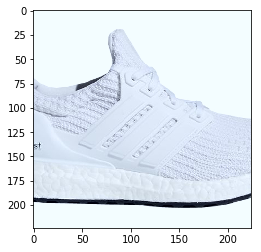

In [17]:
# Process image
image = process_image("test_images/triple_white_ultra_boost.jpg")

# Give image to model to predict output
top_prob, top_class = predict(image, model)

# Show the image
show_image(image)

# Print the results
print("The model is ", top_prob*100, "% certain that the image has a predicted class of ", idx_to_class[top_class])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The model is  99.98241066932678 % certain that the image has a predicted class of  jordan_1_chicago


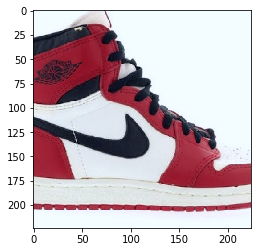

In [20]:
# Process image
image = process_image("test_images/jordan_1_chicago.png")

# Give image to model to predict output
top_prob, top_class = predict(image, model)

# Show the image
show_image(image)

# Print the results
print("The model is ", top_prob*100, "% certain that the image has a predicted class of ", idx_to_class[top_class])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The model is  100.0 % certain that the image has a predicted class of  frozen_yellow_yeezy


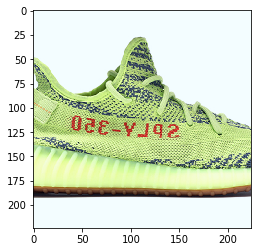

In [22]:
# Process image
image = process_image("test_images/frozen_yellow_yeezy.png")

# Give image to model to predict output
top_prob, top_class = predict(image, model)

# Show the image
show_image(image)

# Print the results
print("The model is ", top_prob*100, "% certain that the image has a predicted class of ", idx_to_class[top_class])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The model is  99.99997615814209 % certain that the image has a predicted class of  solar_red_ultra_boost


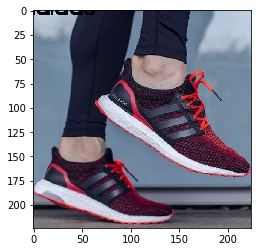

In [24]:
# Process image
image = process_image("test_images/solar_red_UB_on_feet.jpg")

# Give image to model to predict output
top_prob, top_class = predict(image, model)

# Show the image
show_image(image)

# Print the results
print("The model is ", top_prob*100, "% certain that the image has a predicted class of ", idx_to_class[top_class])